In [3]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt 
from warnings import filterwarnings
filterwarnings('ignore')


Data Validations

In [4]:
df=pd.read_csv("../Data/wine.csv")

In [5]:
df.head()

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.4              0.70         0.00             1.9      0.076   
1            7.8              0.88         0.00             2.6      0.098   
2            7.8              0.76         0.04             2.3      0.092   
3           11.2              0.28         0.56             1.9      0.075   
4            7.4              0.70         0.00             1.9      0.076   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 11.0                  34.0   0.9978  3.51       0.56   
1                 25.0                  67.0   0.9968  3.20       0.68   
2                 15.0                  54.0   0.9970  3.26       0.65   
3                 17.0                  60.0   0.9980  3.16       0.58   
4                 11.0                  34.0   0.9978  3.51       0.56   

   alcohol quality  
0      9.4     bad  
1      9.8     bad  
2      9.8     bad  
3      9.8    good  
4      9.4     bad

In [289]:
df.shape

(1599, 12)

In [290]:
df.tail()

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
1594            6.2             0.600         0.08             2.0      0.090   
1595            5.9             0.550         0.10             2.2      0.062   
1596            6.3             0.510         0.13             2.3      0.076   
1597            5.9             0.645         0.12             2.0      0.075   
1598            6.0             0.310         0.47             3.6      0.067   

      free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
1594                 32.0                  44.0  0.99490  3.45       0.58   
1595                 39.0                  51.0  0.99512  3.52       0.76   
1596                 29.0                  40.0  0.99574  3.42       0.75   
1597                 32.0                  44.0  0.99547  3.57       0.71   
1598                 18.0                  42.0  0.99549  3.39       0.66   

      alcohol quality  
1594     10.5     bad  
1595     11.2    good  
1596     11.0    good  
1597     10.2     bad  
1598     11.0    good

In [291]:
df.describe()

fixed acidity  volatile acidity  citric acid  residual sugar  \
count    1599.000000       1599.000000  1599.000000     1599.000000   
mean        8.319637          0.527821     0.270976        2.538806   
std         1.741096          0.179060     0.194801        1.409928   
min         4.600000          0.120000     0.000000        0.900000   
25%         7.100000          0.390000     0.090000        1.900000   
50%         7.900000          0.520000     0.260000        2.200000   
75%         9.200000          0.640000     0.420000        2.600000   
max        15.900000          1.580000     1.000000       15.500000   

         chlorides  free sulfur dioxide  total sulfur dioxide      density  \
count  1599.000000          1599.000000           1599.000000  1599.000000   
mean      0.087467            15.874922             46.467792     0.996747   
std       0.047065            10.460157             32.895324     0.001887   
min       0.012000             1.000000              6.000000     0.990070   
25%       0.070000             7.000000             22.000000     0.995600   
50%       0.079000            14.000000             38.000000     0.996750   
75%       0.090000            21.000000             62.000000     0.997835   
max       0.611000            72.000000            289.000000     1.003690   

                pH    sulphates      alcohol  
count  1599.000000  1599.000000  1599.000000  
mean      3.311113     0.658149    10.422983  
std       0.154386     0.169507     1.065668  
min       2.740000     0.330000     8.400000  
25%       3.210000     0.550000     9.500000  
50%       3.310000     0.620000    10.200000  
75%       3.400000     0.730000    11.100000  
max       4.010000     2.000000    14.900000

In [292]:
df.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [293]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   object 
dtypes: float64(11), object(1)
memory usage: 150.0+ KB


In [294]:
df.duplicated().sum()
df.drop_duplicates(inplace=True)
df.shape

(1359, 12)

Univariate Analysis

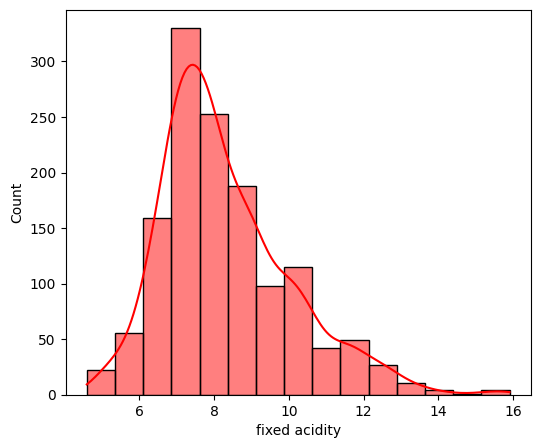

In [295]:
plt.figure(figsize=(6,5))
sns.histplot(df['fixed acidity'],color='red',bins=15,kde=True)
plt.show()

According to Distribution most of the samples are having fixed| actidity in the range of 7-10

In [296]:
df['fixed acidity'].value_counts()

fixed acidity
7.2     49
7.8     48
7.1     46
7.0     44
7.5     42
        ..
13.8     1
13.4     1
4.7      1
15.0     1
5.5      1
Name: count, Length: 96, dtype: int64

Before Removing Outliers

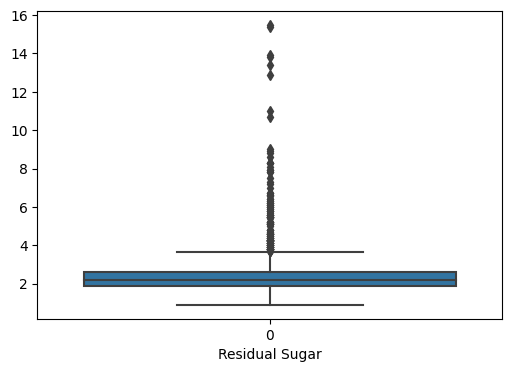

In [297]:
plt.figure(figsize=(6,4))
boxplot1=sns.boxplot(df['residual sugar'],)
boxplot1.set(xlabel='Residual Sugar')
plt.show()

In [298]:
df['residual sugar'].value_counts()

residual sugar
2.00     133
2.20     110
1.80     108
2.10     104
1.90      97
        ... 
2.25       1
2.95       1
2.85       1
3.45       1
13.90      1
Name: count, Length: 91, dtype: int64

#Handling the Outliers

In [576]:
from feature_engine.outliers import Winsorizer
import feature_engine.transformation as vt

windsoriser = Winsorizer(capping_method='iqr',
                          tail='both', 
                          fold=3,
                          variables=['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
                                     'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
                                     'pH', 'sulphates'])
windsoriser.fit(df)
df = windsoriser.transform(df)

After Remoing Outliers

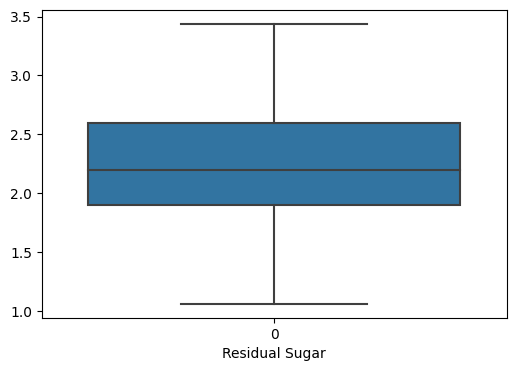

In [341]:
plt.figure(figsize=(6,4))
boxplot1=sns.boxplot(df['residual sugar'],)
boxplot1.set(xlabel='Residual Sugar')
plt.show()

Bivariate Analysis

In [342]:
data=pd.DataFrame.copy(df)
data['quality']=data['quality'].map({'bad':0,'good':1})

<Axes: >

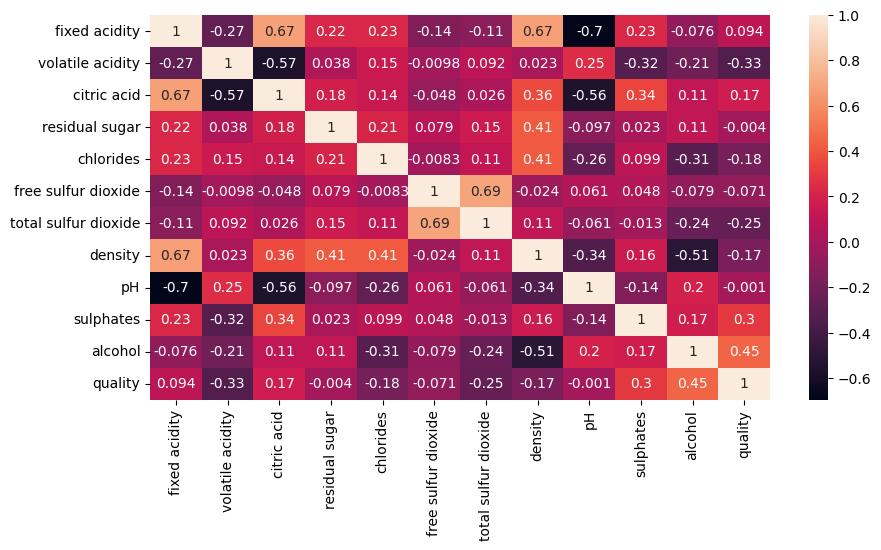

In [343]:
plt.figure(figsize=(10,5))
sns.heatmap(data.corr(),annot=True)

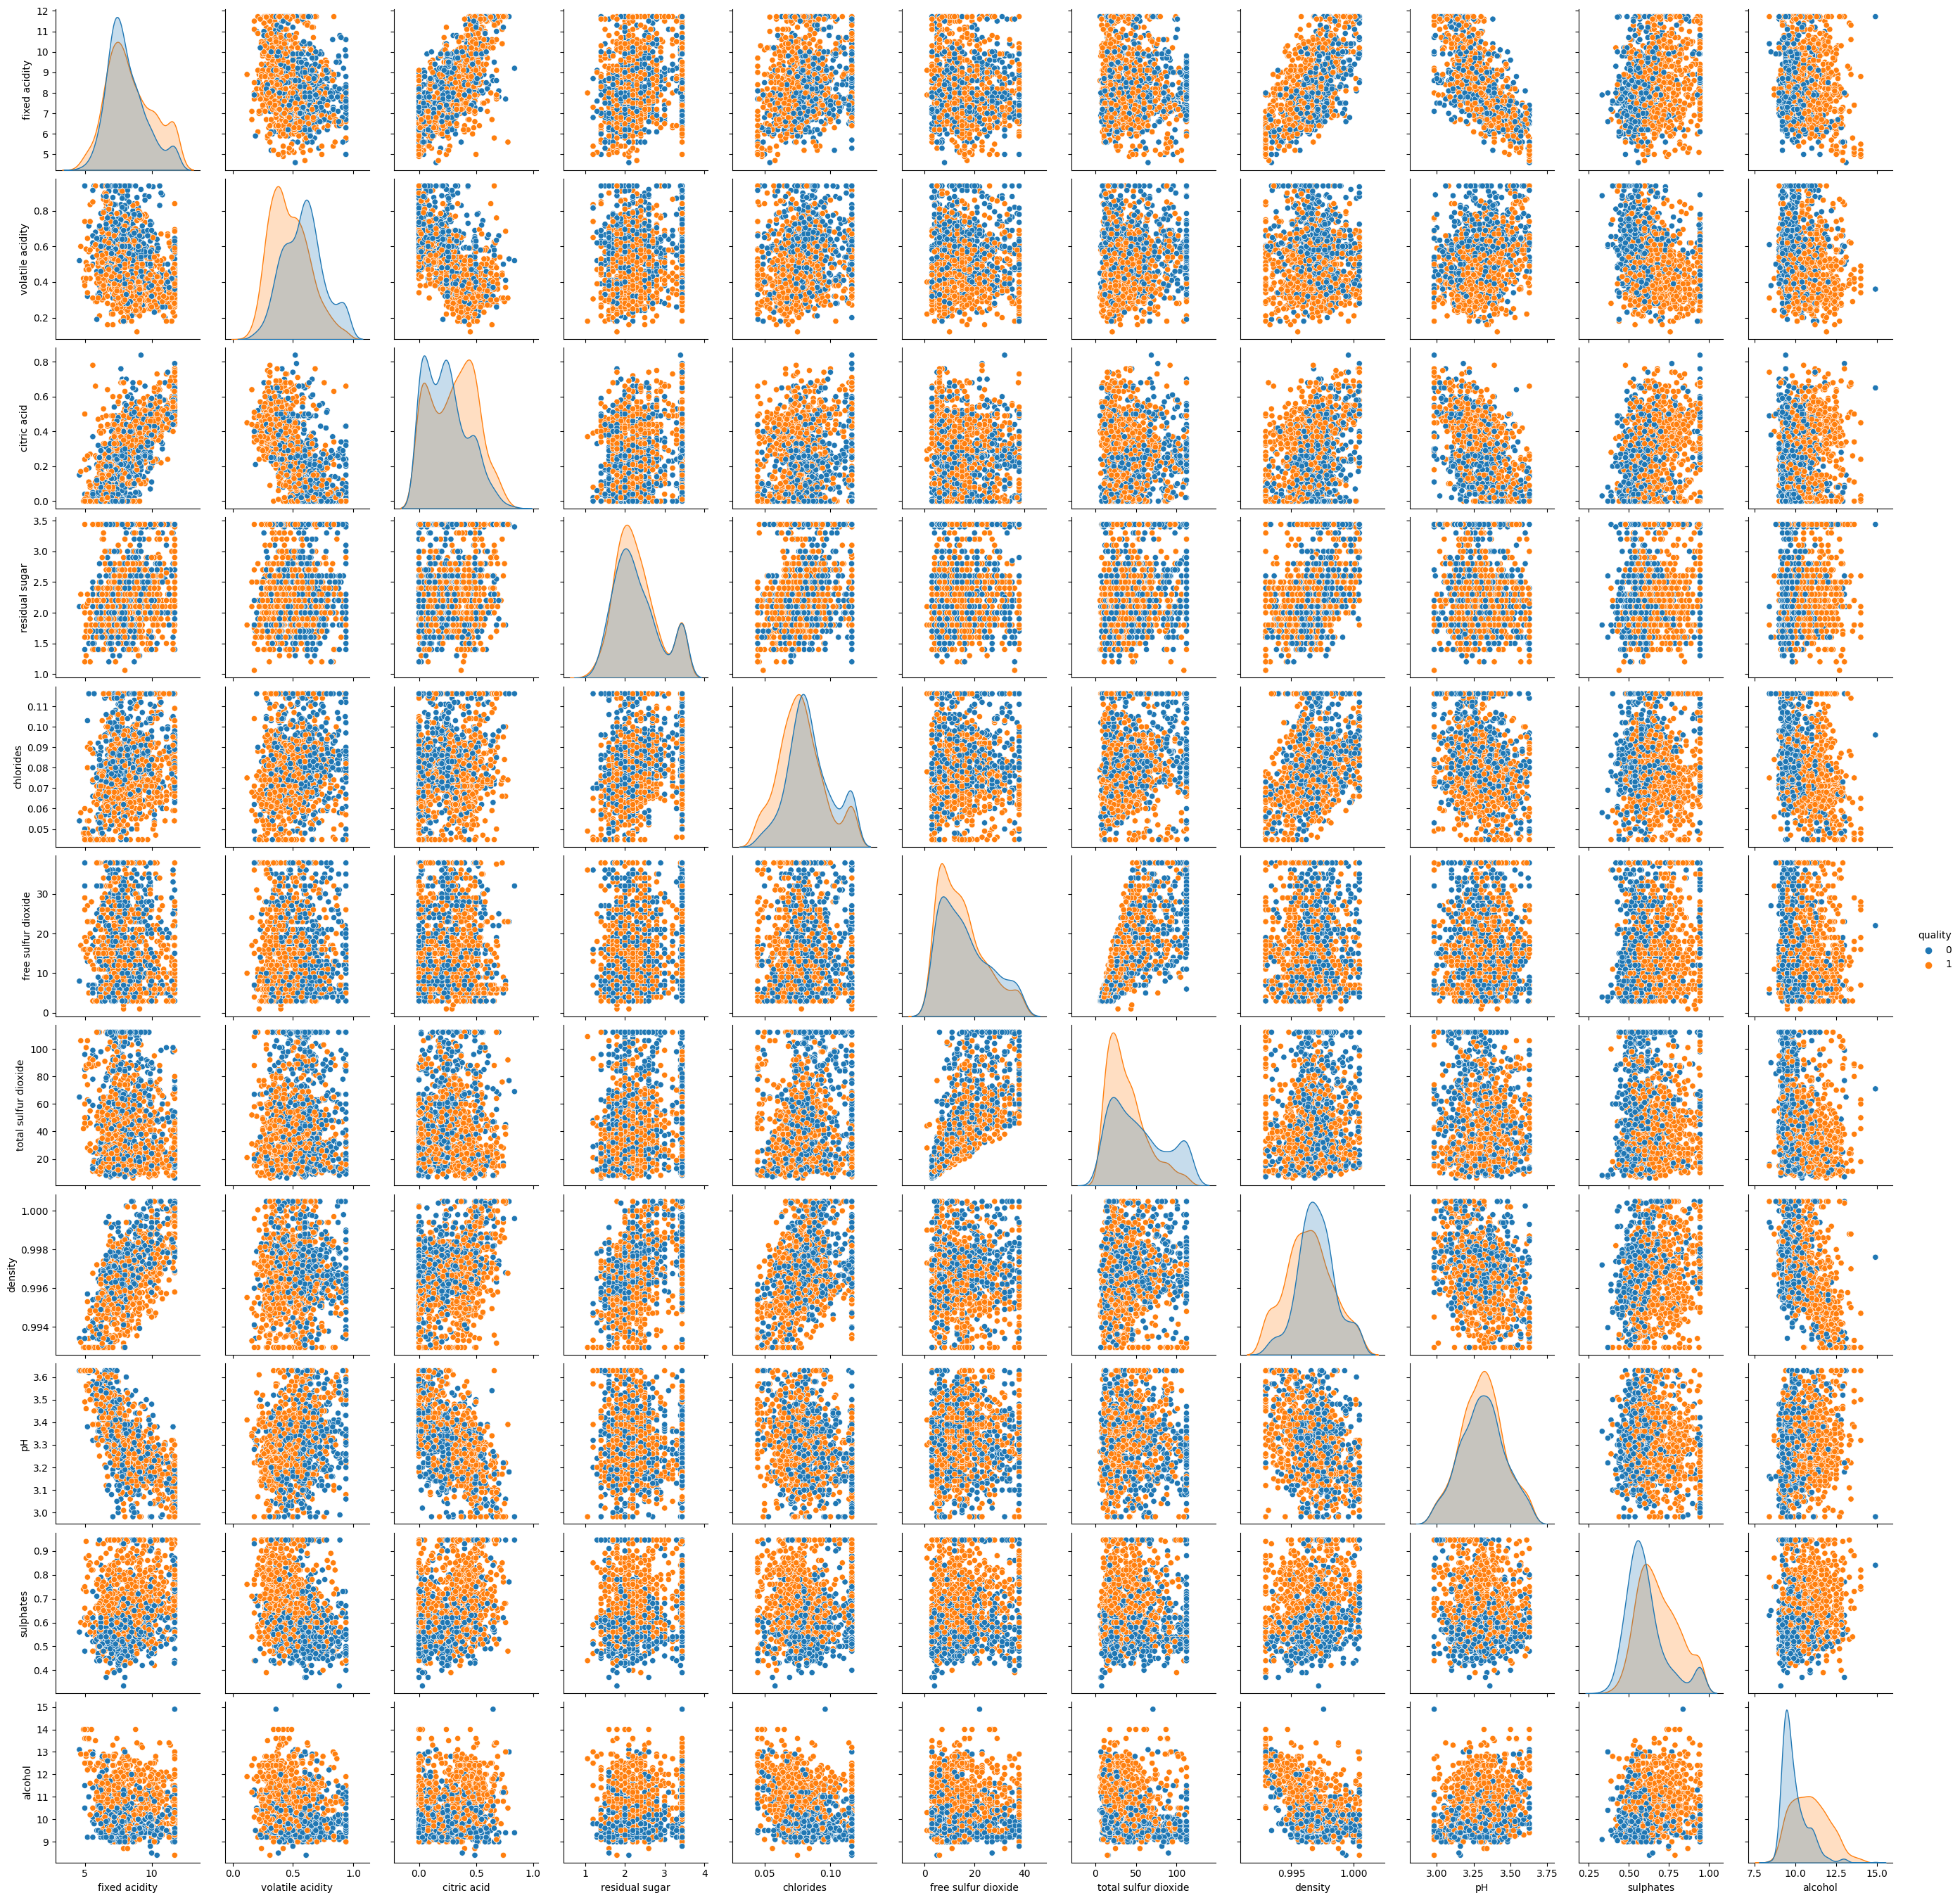

In [344]:
sns.pairplot(data,hue='quality')

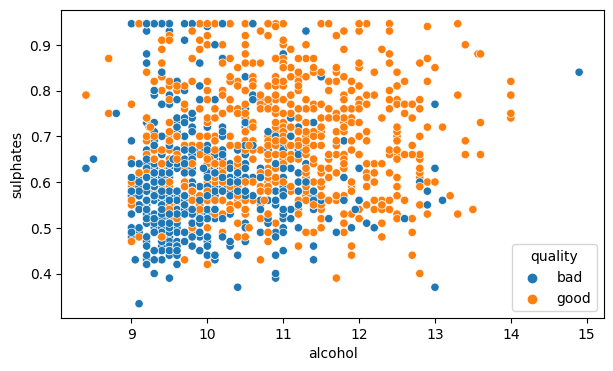

In [626]:
plt.figure(figsize=(7,4))
sns.scatterplot(df,x='alcohol',y='sulphates',hue='quality')
plt.show()

In [405]:
counts=pd.DataFrame(df.groupby('quality').size())
counts=counts.reset_index()
counts.rename(columns={0:'count'},inplace=True)

([<matplotlib.patches.Wedge at 0x1c49c567f90>,
 [Text(0.10030359996730852, 1.0954173578292423, 'bad'),
  Text(-0.10030359996730842, -1.0954173578292423, 'good')],
 [Text(0.05471105452762282, 0.5975003769977685, '47%'),
  Text(-0.05471105452762277, -0.5975003769977685, '53%')])

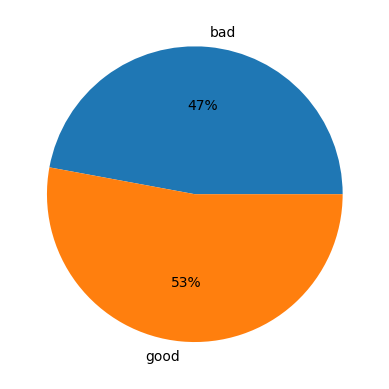

In [406]:
plt.pie(counts['count'],labels=counts['quality'],autopct='%.0f%%')

Model Training

In [407]:
import tensorflow.keras as keras
from keras.models import Sequential
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
from keras.layers import BatchNormalization
from keras.layers import Dense
from keras.optimizers import SGD
from keras.losses import binary_crossentropy
from keras.layers import Dropout 
from sklearn.preprocessing import StandardScaler

In [408]:
X=df.drop('quality',axis=1)

Y=df['quality'].map({'good':1,'bad':0})

In [577]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.27,random_state=111)
Mscaler=StandardScaler()
X_train_sc=Mscaler.fit_transform(X_train)
X_test_sc=Mscaler.transform(X_test)

In [578]:
X_train_sc.shape

(992, 11)

In [579]:
loss='binary_crossentropy'

#cbs=[keras.callbacks.EarlyStopping(patience=20)]
sgd = SGD(learning_rate=0.01)

model=Sequential()

model.compile(loss='binary_crossentropy', optimizer=sgd)

In [580]:
from keras import initializers
# Input Layer
model.add(Dense(11, kernel_initializer=initializers.HeNormal(),activation="relu"))
model.add(BatchNormalization())
model.add(Dropout(0.2))

# First Hidden Layer
model.add(Dense(7, kernel_initializer=initializers.GlorotNormal(),activation="sigmoid"))
model.add(BatchNormalization())
model.add(Dropout(0.2))

#Second Hidden layer
model.add(Dense(4,kernel_initializer=initializers.GlorotNormal(),activation="sigmoid"))
model.add(BatchNormalization())
model.add(Dropout(0.2))

# Third Layer 
model.add(Dense(2,activation="softmax"))
model.add(BatchNormalization())

#Output layer
model.add(Dense(1, activation="sigmoid"))


In [607]:
model.fit(X_train_sc,Y_train,epochs=25,validation_split=0.25,callbacks=cbs)

Epoch 1/25
24/24 [==============================] - 0s 3ms/step - loss: 0.5206 - val_loss: 0.5181
Epoch 2/25
24/24 [==============================] - 0s 2ms/step - loss: 0.5271 - val_loss: 0.5192
Epoch 3/25
24/24 [==============================] - 0s 2ms/step - loss: 0.5199 - val_loss: 0.5207
Epoch 4/25
24/24 [==============================] - 0s 2ms/step - loss: 0.5138 - val_loss: 0.5213
Epoch 5/25
24/24 [==============================] - 0s 2ms/step - loss: 0.5308 - val_loss: 0.5205
Epoch 6/25
24/24 [==============================] - 0s 2ms/step - loss: 0.5202 - val_loss: 0.5207
Epoch 7/25
24/24 [==============================] - 0s 2ms/step - loss: 0.5277 - val_loss: 0.5199
Epoch 8/25
24/24 [==============================] - 0s 3ms/step - loss: 0.5214 - val_loss: 0.5197
Epoch 9/25
24/24 [==============================] - 0s 2ms/step - loss: 0.5183 - val_loss: 0.5187
Epoch 10/25
24/24 [==============================] - 0s 2ms/step - loss: 0.5356 - val_loss: 0.5165
Epoch 11/25
24/24 [

In [608]:
model.summary()

Model: "sequential_23"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_145 (Dense)           (None, 11)                132       
                                                                 
 batch_normalization_100 (B  (None, 11)                44        
 atchNormalization)                                              
                                                                 
 dropout_87 (Dropout)        (None, 11)                0         
                                                                 
 dense_146 (Dense)           (None, 7)                 84        
                                                                 
 batch_normalization_101 (B  (None, 7)                 28        
 atchNormalization)                                              
                                                                 
 dropout_88 (Dropout)        (None, 7)               

Model_Evaluation

In [609]:
Data=pd.DataFrame(model.history.history)

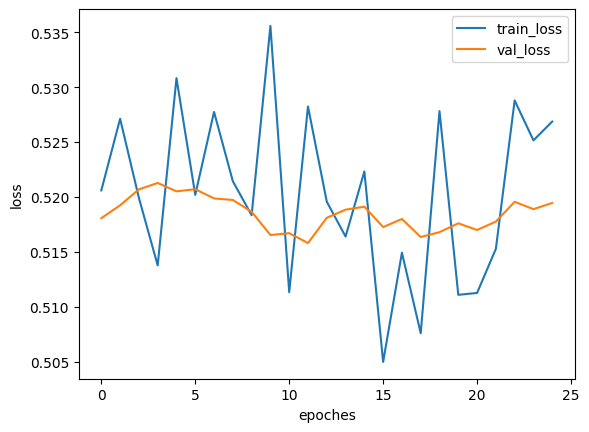

In [610]:
plt.plot(Data)
plt.xlabel('epoches')
plt.ylabel('loss')
plt.legend(['train_loss','val_loss'])
plt.show()

In [611]:
Y_pred_Te=model.predict(X_test_sc)
Y_pred_Tr=model.predict(X_train_sc)

31/31 [==============================] - 0s 833us/step


In [612]:
Y_pred_Te=list(map(lambda x:1 if x>=0.5 else 0,Y_pred_Te))
Y_pred_Tr=list(map(lambda x:1 if x>=0.5 else 0,Y_pred_Tr))

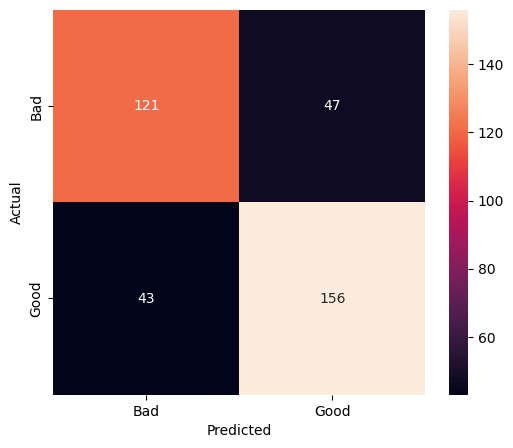

In [613]:
cf=confusion_matrix(Y_test,Y_pred_Te)
plt.figure(figsize=(6,5))
sns.heatmap(cf,annot=True,fmt='g',xticklabels=['Bad','Good'],yticklabels=['Bad','Good'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [621]:
Testing_Accuracy=accuracy_score(Y_test,Y_pred_Te)
Testing_Accuracy

0.7547683923705722

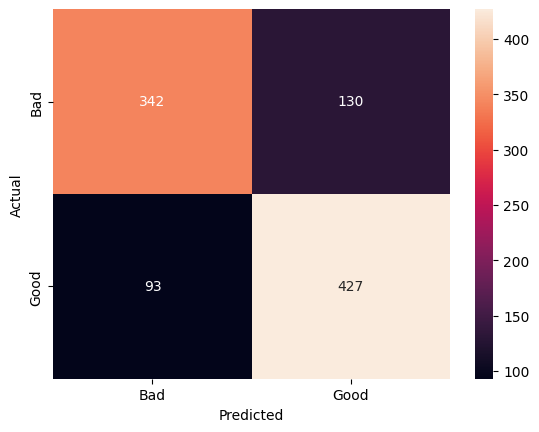

In [622]:
cf=confusion_matrix(Y_train,Y_pred_Tr)
plt.figure()
sns.heatmap(cf,annot=True,fmt='g',xticklabels=['Bad','Good'],yticklabels=['Bad','Good'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [623]:
Training_Accuracy=accuracy_score(Y_train,Y_pred_Tr)
Training_Accuracy

0.7752016129032258

Saving the Trained Model

In [624]:
import pickle as pkl

In [625]:
pkl.dump(model,file=open('model.pkl','wb'))